### Assignment 2: Interactions in Regression, Fixed Effects in Regression and Logistic Regression

In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report

### Question 1: Sales.csv

### Linear regression model

In [2]:
# Load the dataset from local csv file
df = pd.read_csv("/Users/Administratoor/Documents/Winter/BAX 452 - Machine Learning/Assignment 2/sales.csv")
df

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
0,1000,0.79,0.80,0.02,1.75
1,1001,0.83,0.08,0.18,1.75
2,1002,0.85,0.01,0.22,1.75
3,1003,1.25,0.00,0.03,1.75
4,1004,0.72,0.04,0.10,1.74
...,...,...,...,...,...
2995,3995,0.20,0.00,0.07,0.49
2996,3996,0.28,0.00,0.04,0.49
2997,3997,0.00,0.49,0.00,0.49
2998,3998,0.07,0.09,0.07,0.49


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3000 non-null   int64  
 1   area1_sales  3000 non-null   float64
 2   area2_sales  3000 non-null   float64
 3   area3_sales  3000 non-null   float64
 4   total_sales  3000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.3 KB


In [5]:
df.columns

Index(['Unnamed: 0', 'area1_sales', 'area2_sales', 'area3_sales',
       'total_sales'],
      dtype='object')

In [6]:
df.isnull().sum() # Find no null values in the raw dataset

Unnamed: 0     0
area1_sales    0
area2_sales    0
area3_sales    0
total_sales    0
dtype: int64

In [8]:
# Build a linear regression model with three independent variables
x = df[['area1_sales','area2_sales','area3_sales']]
y = df[['total_sales']]

In [9]:
x

,area1_sales,area2_sales,area3_sales
0,0.79,0.80,0.02
1,0.83,0.08,0.18
2,0.85,0.01,0.22
3,1.25,0.00,0.03
4,0.72,0.04,0.10
...,...,...,...
2995,0.20,0.00,0.07
2996,0.28,0.00,0.04
2997,0.00,0.49,0.00
2998,0.07,0.09,0.07


In [10]:
y

,total_sales
0,1.75
1,1.75
2,1.75
3,1.75
4,1.74
...,...
2995,0.49
2996,0.49
2997,0.49
2998,0.49


In [11]:
# Splitting data into train and test subsets
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.25 , random_state=42)

In [12]:
# Scaling data using Robust Scalar
ro_scaler=RobustScaler()
x_train=ro_scaler.fit_transform(x_train)
x_test=ro_scaler.fit_transform(x_test)

In [16]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
print(reg.score(x_test,y_test)) # return R^squared
print(reg.intercept_)
print(reg.coef_)

0.7037260514801333
[0.76212315]
[[0.30837903 0.05992989 0.12899234]]


### Effects of interactions

In [54]:
area1_sales = df[['area1_sales']]
area2_sales = df[['area2_sales']]
area3_sales = df[['area3_sales']]

In [55]:
area1_sales

,area1_sales
0,0.79
1,0.83
2,0.85
3,1.25
4,0.72
...,...
2995,0.20
2996,0.28
2997,0.00
2998,0.07


In [42]:
import seaborn as sns
import statsmodels.formula.api as smf

In [46]:
# Linear regression model without interaction
sales_model = smf.glm(formula='y ~ area1_sales + area2_sales + area3_sales', data=df)

result = sales_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                        0.035294
Method:                          IRLS   Log-Likelihood:                 761.25
Date:                Thu, 19 Jan 2023   Deviance:                       105.74
Time:                        12:43:57   Pearson chi2:                     106.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9050
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2601      0.008     30.743      

In [48]:
# Linear regression model with interaction between x1 and x2
sales_model_interaction12 = smf.glm(formula='y ~ area1_sales + area2_sales + area3_sales + area1_sales:area2_sales', data=df)

result12 = sales_model_interaction12.fit()
print(result12.summary())

# The coefficient of interaction term area1_sales:area2_sales is significant.
# The R-squared also increased slight from 0.9050 to 0.9094 for the entire model.
# The coefficients of x1,x2,x3 have not changed drastically after adding the interaction term.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                        0.034805
Method:                          IRLS   Log-Likelihood:                 782.67
Date:                Thu, 19 Jan 2023   Deviance:                       104.24
Time:                        12:59:52   Pearson chi2:                     104.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9094
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [49]:
# Linear regression model with interaction between x1 and x3
sales_model_interaction13 = smf.glm(formula='y ~ area1_sales + area2_sales + area3_sales + area1_sales:area3_sales', data=df)

result13 = sales_model_interaction13.fit()
print(result13.summary())

# The coefficient of interaction term area1_sales:area3_sales is not significant.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                        0.034703
Method:                          IRLS   Log-Likelihood:                 787.08
Date:                Thu, 19 Jan 2023   Deviance:                       103.94
Time:                        13:01:57   Pearson chi2:                     104.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9103
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [50]:
# Linear regression model with interaction between x2 and x3
sales_model_interaction23 = smf.glm(formula='y ~ area1_sales + area2_sales + area3_sales + area2_sales:area3_sales', data=df)

result23 = sales_model_interaction23.fit()
print(result23.summary())

# The coefficient of interaction term area2_sales:area3_sales is not significant.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                        0.035009
Method:                          IRLS   Log-Likelihood:                 773.92
Date:                Thu, 19 Jan 2023   Deviance:                       104.85
Time:                        13:02:34   Pearson chi2:                     105.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9076
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

#### Therefore, there are effects of interactions between area1_sales and area2_sales. 

#### The linear regression model is: 
#### Total_sales = 0.2698 + 0.8889 * area1_sales + 0.6912 * area2_sales + 1.7027 * area3_sales + 0.4149 * (area1_sales:area2_sales)

### * Predict total_sales with Decision Trees (additional exploration)

In [59]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)
predict = model.predict(x_test) #Predictions on Testing data
print(predict)

[0.62594017 0.99340206 0.62594017 1.05462963 0.62594017 1.13414634
 0.75555556 0.62594017 1.66       0.62594017 0.62594017 1.59222222
 1.13414634 0.8575     1.06081081 1.05462963 1.21702703 1.13159091
 0.70447552 0.62594017 1.66       1.40352941 1.13159091 0.62594017
 0.95693878 0.62594017 0.62594017 1.05462963 1.40352941 1.33444444
 0.90385417 0.96666667 0.99340206 0.7485     1.38197183 0.8575
 1.13159091 1.21702703 1.3904     1.05462963 1.38197183 1.59222222
 1.21702703 0.99340206 0.70447552 0.62594017 0.62594017 1.597
 0.62594017 0.62594017 0.7485     0.62594017 1.515      0.62594017
 0.96666667 0.62594017 0.62594017 1.33222222 0.70447552 1.13414634
 1.38197183 1.05462963 1.13414634 1.33444444 1.38197183 0.8575
 0.75555556 0.90385417 0.8575     1.29923077 0.8575     0.62594017
 0.62594017 0.70447552 1.66       1.13414634 0.62594017 0.62594017
 0.7485     0.62594017 0.70447552 1.05462963 1.33444444 0.7485
 0.70447552 1.3904     0.62594017 1.05462963 0.70447552 0.70447552
 1.40352941 

### Question 2: Customer.csv

### Logistic regression model

In [2]:
import pandas as pd
from sklearn import datasets
import statsmodels.formula.api as smf 
import statsmodels.api as sm

In [3]:
customer = pd.read_csv("/Users/Administratoor/Documents/Winter/BAX 452 - Machine Learning/Assignment 2/customer.csv")
customer.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Categorical variables: "Gender"
customer['gender_class']=np.where(customer['Gender'] =='Male', '1', customer['Gender'])

In [5]:
customer['gender_class']=np.where(customer['gender_class'] =='Female', '0', customer['gender_class'])
customer

,User ID,Gender,Age,EstimatedSalary,Purchased,gender_class
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [6]:
customer = customer[['Age','EstimatedSalary','gender_class','Purchased']]
customer

,Age,EstimatedSalary,gender_class,Purchased
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0
...,...,...,...,...
395,46,41000,0,1
396,51,23000,1,1
397,50,20000,0,1
398,36,33000,1,0


### Logistic regression models trimmed over features in the data

In [7]:
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Recursive Feature Elimination
X = customer[['Age','EstimatedSalary','gender_class']]
y = customer[['Purchased']]

In [20]:
X

,Age,EstimatedSalary,gender_class
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [21]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [45]:
# Select two features:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select= 2)
rfe = rfe.fit(X, y.values.ravel())

In [46]:
print(rfe.support_)

[ True  True False]


In [47]:
print(rfe.ranking_)

[1 1 2]


The RFE has helped us select the following features: "Age", "EstimatedSalary"

In [49]:
# Select only one feature:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select= 1)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)

[False  True False]


The RFE has helped us select feature: "EstimatedSalary" when we only want one explanatory varaible.

### Split data into train and test subsets (Model a)

In [57]:
# Train data in terms of selecting two features
X = customer[['Age','EstimatedSalary']]

In [58]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size= 0.25 , random_state=42)

In [59]:
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.fit_transform(X_test)

### Develop different logistic regression models (Model a)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logit_model_two = LogisticRegression(random_state=0)
result = logit_model_two.fit(X_train, y_train.values.ravel())
print(logit_model_two.coef_)

[[2.64670081 1.34172524]]


In [62]:
print(logit_model_two.intercept_)

[-1.1049615]


In [63]:
print(logit_model_two.score(X_test,y_test)) # Return in-sample R2" (pseudo) 

0.86


Hence, the trimmed logistic regression model (with two features) is:

Log(Prob.(Purchased)/(1-Prob.)) = -1.105 + 2.6467 * Age + 1.342 * EstimatedSalary.

### Split data into train and test subsets (Model b)

In [45]:
# Alternatively, train data in terms of selecting only one feature
X = customer[['EstimatedSalary']]

In [46]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size= 0.25 , random_state=42)

In [47]:
ro_scaler=RobustScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.fit_transform(X_test)

### Develop different logistic regression models (Model b)

In [34]:
from sklearn.linear_model import LogisticRegression

In [48]:
logit_model_one = LogisticRegression(random_state=0)
result = logit_model_one.fit(X_train, y_train.values.ravel())
print(logit_model_one.coef_)

[[1.07074015]]


In [49]:
print(logit_model_one.intercept_)

[-0.66476748]


In [50]:
print(logit_model_one.score(X_test,y_test)) # Return in-sample R2" (pseudo) 

0.76


Hence, the trimmed logistic regression model (with only one feature) is:

Log(Prob.(Purchased)/(1-Prob.)) = -0.665 + 1.071*EstimatedSalary.

#### By comparison, in terms of "in-sample R2" (pseudo), among the trained trimmed logistic regression models, Model a is more accurate than Model b in predicting whether customer will purchase the product.

#### For the Logistic Regression models trained above, the best model I pick wrt to the in-sample R2 is as following:

#### Log(Prob.(Purchased)/(1-Prob.))= -1.105 + 2.6467 * Age + 1.342 * EstimatedSalary.   (Model a)

### Question 3: Interpretation of the above model’s coefficients

In [54]:
import math
math.exp(2.64670081) # Coefficient of Age var.

14.107418728885309

The coefficient of Age variable is positive, indicating a posivite relationship between the age of customer and the likelihood of purchasing the product.

Also, an increase in Age of customer multiplies the odds of Purchasing by 14.1074.

In [55]:
math.exp(1.34172524) # Coefficient of EstimatedSalary var.

3.825637958855329

The coefficient of EstimatedSalary variable is positive, indicating a posivite relationship between the Estimated Salary of customer and the likelihood of purchasing the product.

Also, an increase in Estimated Salary of customer multiplies the odds of Purchasing by 3.8256.

### Question 4: Accuracy

Is accuracy a good metric to judge the above model?

Accuracy is defined as the ratio of correctly predicted examples by the total examples. It is a good metric, because the ratio reflects the overall performance of our prediction model and tells us how often the classifier is being correct.

However, other metrics such as precision and recall are also practical in assessing model performance. Precision measures the percentage of true positives among all predicted positives, showing how often is our model correct when predicting 'yes'. Similarly, recall refers to true positive rate, which measures the percentage of true positives among all actual positives. Recall shows how often the model predicts a 'yes' when it's actually 'yes'. 

The above alternatives provide us with more reliable evaluation of logistic regression models.

In [70]:
# Additional exploration - Confusion Matrix
y_pred = logit_model_two.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[61  2]
 [12 25]]


In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



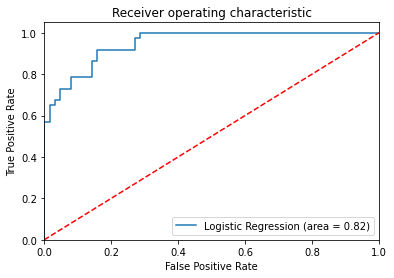

In [74]:
# Additional exploration - ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logit_model_two.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit_model_two.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Question 5: Interaction Plot

In [77]:
# Set the two featured variables
Age = customer[['Age']]
Gender = customer[['gender_class']]

In [78]:
Age

,Age
0,19
1,35
2,26
3,27
4,19
...,...
395,46
396,51
397,50
398,36


In [79]:
Gender

,gender_class
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [80]:
# y as the ‘Purchased’ output
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [108]:
# Check the dataset is correct:
customer

,Age,EstimatedSalary,gender_class,Purchased
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0
...,...,...,...,...
395,46,41000,0,1
396,51,23000,1,1
397,50,20000,0,1
398,36,33000,1,0


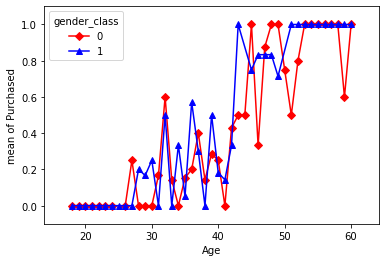

In [111]:
# Plot the interactions of the ‘Age’ and ‘Gender’ features with the ‘Purchased’ output
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# Help with the function - "interaction_plot?""
interaction_plot(customer['Age'], customer['gender_class'],customer['Purchased'], xlabel='Age', ylabel='Purchased', 
                 colors=['red','blue'], markers=['D','^'])
plt.show()

### Question 6: Effect of "Income" and Change in "savings" on "Likelihood of buying a house"

For each plot: Should the regression equation include the interaction terms (interaction between Income and Average Savings) or not? 

Why or why shouldn’t they be included？

- (a) Should include the interaction term:

Interaction plot(a) shows that increase in average savings will overall increase the likelihood of buying a house in terms of all income levels. However, the slope and intercept of the three lines are different from each other, which indicates that switching between different income groups does change the effect of savings on the dependent variable y (likelihood).

- (b) Should include the interaction term:

Interaction plot(b) shows that increase in average savings will increase the likelihood of buying a house for low-income group, but will decrease the likelihood for high-income group. That is to say, the effect of average savings on likelihood of buying a house is affected by which income group a person belongs to. When average savings increase, the outcome that a customer is more/less likely to buy a house is determined by whether he(she) has low/high income. 

- (c) Should not include the interaction term:

Interaction plot(c) shows that increase in average savings will decrease the likelihood of buying a house for both low- and high-income group. The slope of two lines are the same, though they have different intercepts. Therefore, the income level has additive effect on y(likelihood). No need to add interaction term here. 